# Data Viz for RL
by Jiazhen Zhu June 2018

## Steps Covered
1. [Load and Clean Data](#LoadCleanData)
<br>
<br>
2. [Data Understanding and Viz](#DataUnderstandingViz)
    *  [Boxplot](#Boxplot)
    *  [Scatterplot Matrix](#ScatterplotMatrix)
    *  [Detail Scatter Matrix](#DetailScatterMatrix)
    *  [Heatmap](#Heatmap)
    *  [Bar Chart](#BarChart)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from numpy import median

<a id='LoadCleanData'></a>
# 1. Load and Clean Data

In [2]:
# import Reinforcement Learning data
rl = pd.read_csv('log-250-training.txt', sep=" ", header=None)
rl = rl.iloc[:, [7, 9, 12, 14]]
rl.columns = ['episode_number', 'score', 'time_step', 'global_time']
# import greedy data
greedy = pd.read_csv('log-greedy-best-first-search.txt', sep=" ", header=None)
greedy = greedy.iloc[:, [7, 9, 12, 14]]
greedy.columns = ['episode_number', 'score', 'time_step', 'global_time']
# import random data
random = pd.read_csv('log-random-walk.txt', sep=" ", header=None)
random = random.iloc[:, [7, 9, 12, 14]]
random.columns = ['episode_number', 'score', 'time_step', 'global_time']
# import a star
a_star = pd.read_csv('log-a-star.txt', sep=" ", header=None)
a_star = a_star.iloc[:, [7, 9, 12, 14]]
a_star.columns = ['episode_number', 'score', 'time_step', 'global_time']
# # import random blocked
# random_blocked = pd.read_csv('log-random-walk-blocked-walls.txt', sep=" ", header=None)
# random_blocked = random_blocked.iloc[:, [7, 9, 12, 14]]
# random_blocked.columns = ['episode_number', 'score', 'time_step', 'global_time']
# import rule based
rule_based = pd.read_csv('log-rule-based-search.txt', sep=" ", header=None)
rule_based = rule_based.iloc[:, [7, 9, 12, 14]]
rule_based.columns = ['episode_number', 'score', 'time_step', 'global_time']
# import rule based
value_iteration = pd.read_csv('log-value-iteration.txt', sep=" ", header=None)
value_iteration = value_iteration.iloc[:, [7, 9, 12, 14]]
value_iteration.columns = ['episode_number', 'score', 'time_step', 'global_time']

In [3]:
# clean data 
rl = rl.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))
greedy = greedy.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))
random = random.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))
a_star = a_star.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))
# random_blocked = random_blocked.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))
rule_based = rule_based.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))
value_iteration = value_iteration.applymap(lambda x: x if len(x.split(':')) == 1 else int(x.split(':')[1]))

In [4]:
min_episode = min(len(rl), len(greedy), len(random), len(rule_based), len(value_iteration))
print(min_episode)

2023


In [5]:
rl['category'] = 'F.L.'
greedy['category'] = 'Greedy'
random['category'] = 'Random'
a_star['category'] = 'A_Star'
# random_blocked['category'] = 'Random_Blocked'
rule_based['category'] = 'Rule_Based'
value_iteration['category'] = 'Value_Iter'

In [6]:
data_full = rl.append([greedy, random, a_star, rule_based, value_iteration], ignore_index=True)
data = rl[:min_episode].append([greedy[:min_episode], random[:min_episode], a_star[:min_episode], rule_based[:min_episode], value_iteration[:min_episode]], ignore_index=True)
print(len(data))

10187


In [7]:
data.groupby('category').count()

,episode_number,score,time_step,global_time
category,,,,
A_Star,72,72,72,72
F.L.,2023,2023,2023,2023
Greedy,2023,2023,2023,2023
Random,2023,2023,2023,2023
Rule_Based,2023,2023,2023,2023
Value_Iter,2023,2023,2023,2023


In [8]:
data_full.groupby('category').count()

,episode_number,score,time_step,global_time
category,,,,
A_Star,72,72,72,72
F.L.,5420,5420,5420,5420
Greedy,2224,2224,2224,2224
Random,2023,2023,2023,2023
Rule_Based,2033,2033,2033,2033
Value_Iter,2940,2940,2940,2940


In [9]:
print(data.head())

   episode_number  score  time_step  global_time category
0               0     -8          5            5     F.L.
1               1   -208          5           10     F.L.
2               2     -8          5           15     F.L.
3               3   -105          3           18     F.L.
4               4   -105          3           21     F.L.


In [10]:
data.dtypes

episode_number     int64
score              int64
time_step          int64
global_time        int64
category          object
dtype: object

<a id='DataUnderstandingViz'></a>
# 2. Data Understanding and Viz

<a id='Boxplot'></a>
## 2.1 Boxplot

#### Boxplot

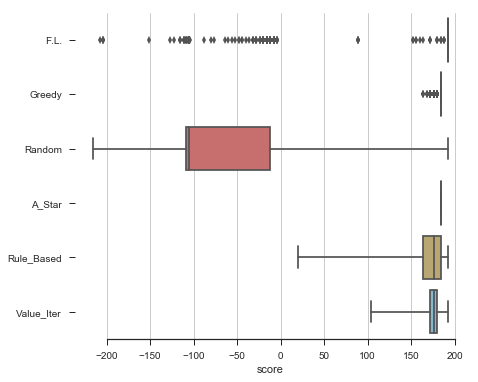

In [11]:
sns.set(style='ticks')

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='score', y='category', data=data,
            whis=np.inf, palette='muted')

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel='')
sns.despine(trim=True, left=True)

<a id='ScatterplotMatrix'></a>
## 2.2 Scatterplot Matrix

### Scatterplot Matrix

#### an overview for the whole dataset

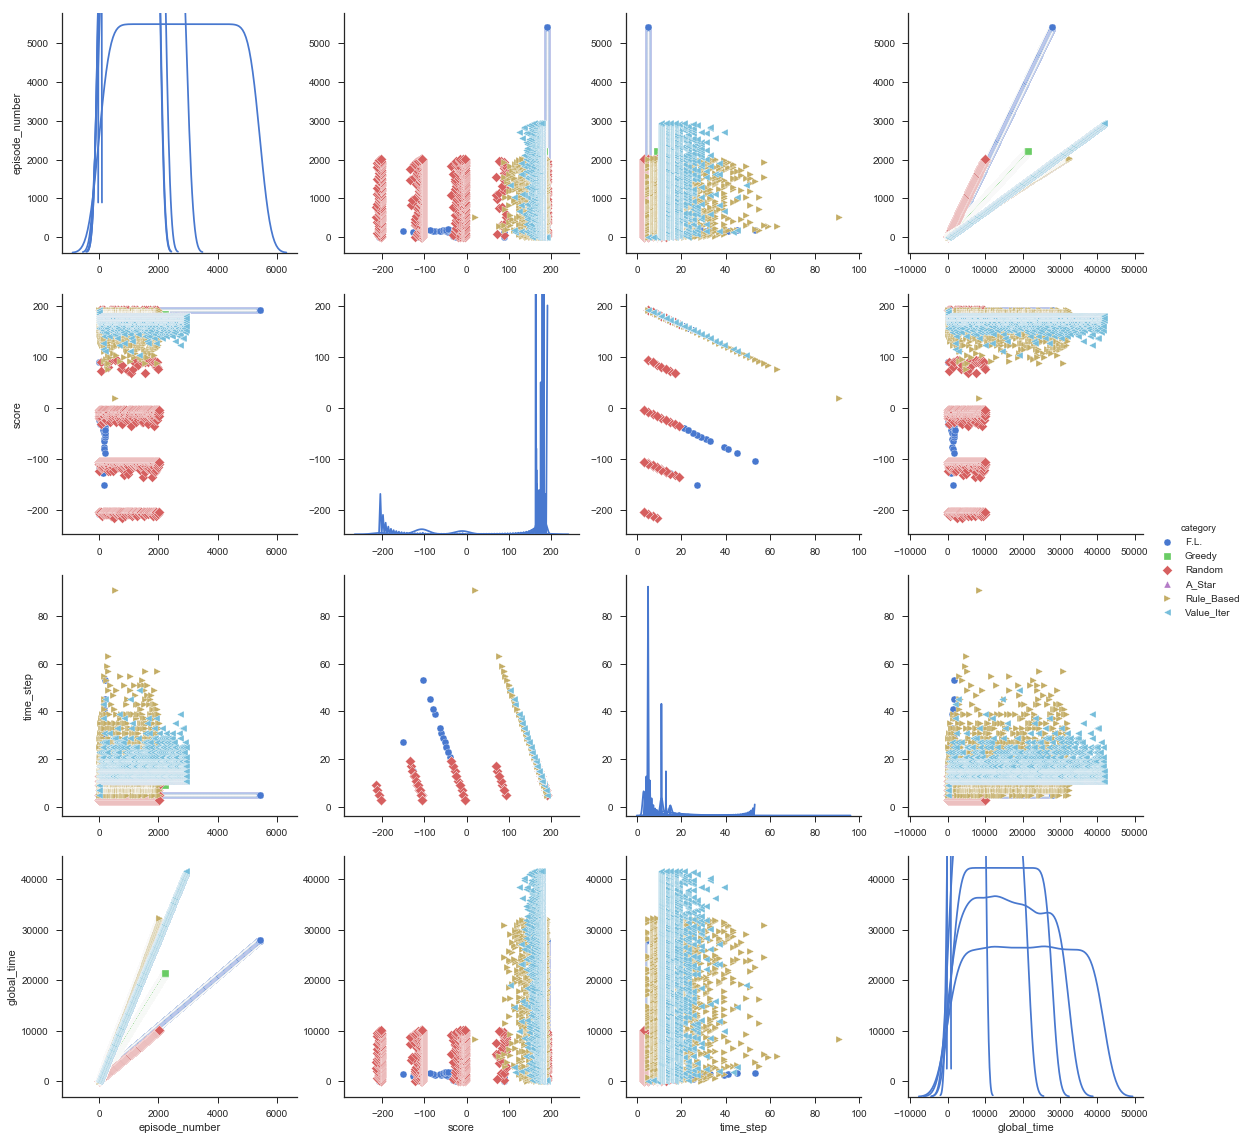

In [12]:
sns.pairplot(data_full, hue='category', palette='muted', markers=['o', 's', 'D', '^', '>', '<'], diag_kind='kde', size=4)

<a id='DetailScatterplotMatrix'></a>
## 2.3 Detail Scatter Matrix

### Detail Scatter Matrix

##### We just present different kind of scatter matrix for score and time_step.
##### We can find that random and a_star are very similar. rl and greedy are very similar.
### However, rl has uptrend for score and has downward trend for time_step.
### For rl, at first the score is lower than others, but it increase.

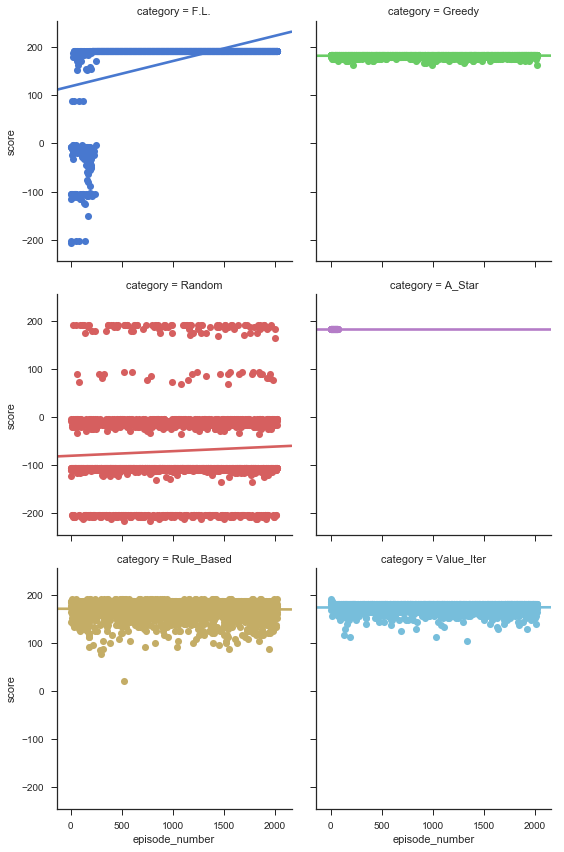

In [13]:
sns.set(style='ticks')

# Show the results of a linear regression within each dataset
sns.lmplot(x='episode_number', y='score', col='category', hue='category', data=data,
           col_wrap=2, ci=None, palette='muted', size=4,
           scatter_kws={'s': 50, 'alpha': 1})

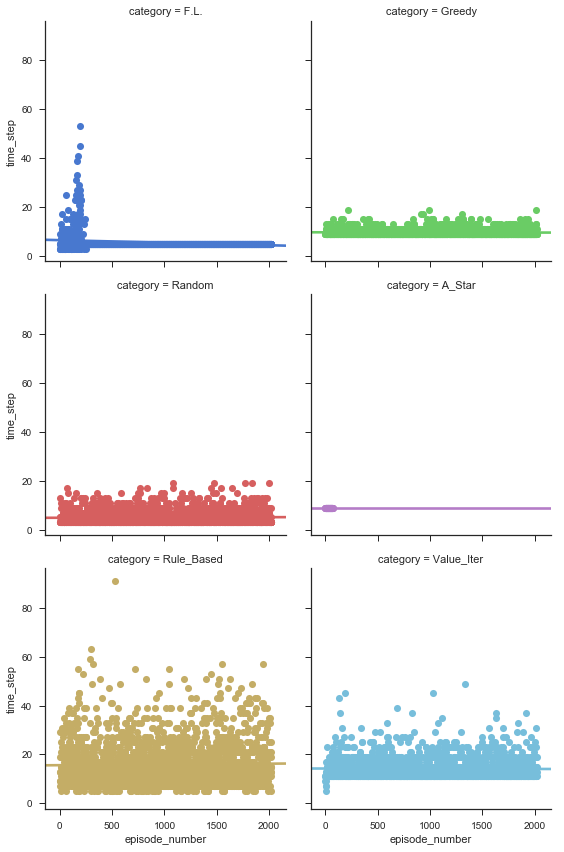

In [14]:
sns.set(style='ticks')

# Show the results of a linear regression within each dataset
sns.lmplot(x='episode_number', y='time_step', col='category', hue='category', data=data,
           col_wrap=2, ci=None, palette='muted', size=4,
           scatter_kws={'s': 50, 'alpha': 1})

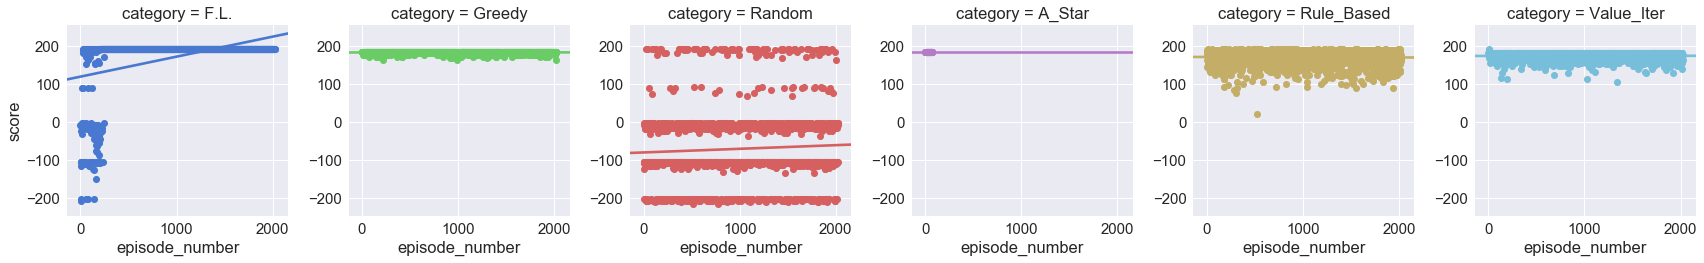

In [15]:
sns.set(font_scale=1.5)
sns.lmplot(x='episode_number', y='score', col='category', hue='category', data=data,
           ci=None, palette='muted', size=4,
           scatter_kws={'s': 50, 'alpha': 1})

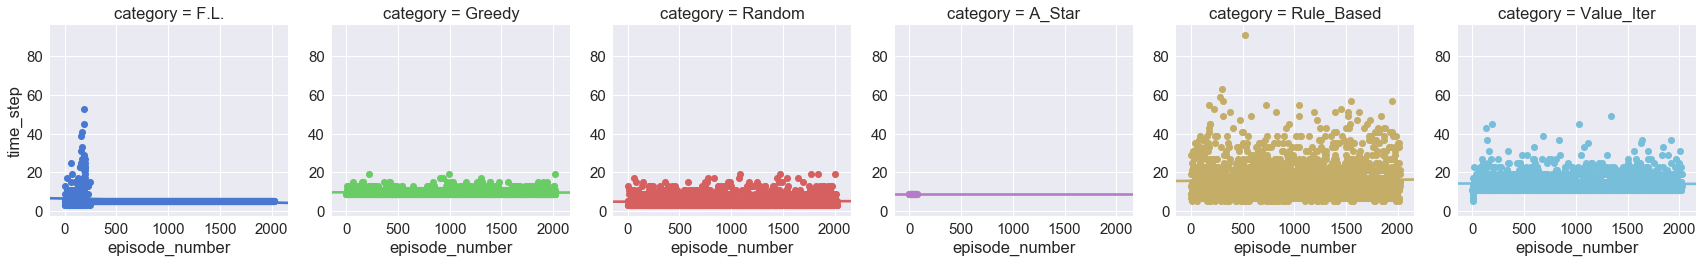

In [16]:
sns.set(font_scale=1.5)
sns.lmplot(x='episode_number', y='time_step', col='category', hue='category', data=data,
           ci=None, palette='muted', size=4,
           scatter_kws={'s': 50, 'alpha': 1})

<a id='Heatmap'></a>
## 2.4 Heatmap

### Heatmap

### Based on the heatmap, we can find that rl has biggest count for highest level socre (>=190)

In [17]:
def score_category(score):
    if score < -150:
        return '< -150'
    elif -150 <= score < -100:
        return '-150 ~ -100'
    elif -100 <= score < -50:
        return '-100 ~ -50'
    elif -50 <= score < 0:
        return '-50 ~ 0'
    elif 0 <= score < 50:
        return '0 ~ 50'
    elif 50 <= score < 100:
        return '50 ~ 100'
    elif 100 <= score < 150:
        return '100 ~ 150'
    elif 150 <= score < 190:
        return '150 ~ 190'
    elif score >= 190:
        return '>= 190'

In [18]:
data['score_category'] = data['score'].apply(score_category)

In [19]:
tmp = data[['episode_number', 'category', 'score_category']].groupby(by=['category', 'score_category']).episode_number.count()

In [20]:
columns = ['< -150', '-150 ~ -100', '-100 ~ -50', '-50 ~ 0', '0 ~ 50', '50 ~ 100', '100 ~ 150', '150 ~ 190', '>= 190']

In [21]:
pivot_table = tmp.unstack(level=-1)

In [22]:
heat_map_data = pivot_table.fillna(0).astype(np.int64)

In [23]:
heat_map_data = heat_map_data.loc[:, columns].fillna(0).astype(np.int64)
heat_map_data

score_category,< -150,-150 ~ -100,-100 ~ -50,-50 ~ 0,0 ~ 50,50 ~ 100,100 ~ 150,150 ~ 190,>= 190
category,,,,,,,,,
A_Star,0,0,0,0,0,0,0,72,0
F.L.,6,43,7,107,0,4,0,18,1838
Greedy,0,0,0,0,0,0,0,2023,0
Random,260,978,0,651,0,31,0,45,58
Rule_Based,0,0,0,0,1,10,240,1718,54
Value_Iter,0,0,0,0,0,0,40,1982,1


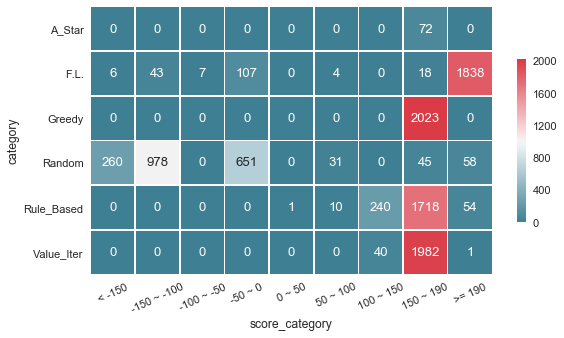

In [24]:
sns.set()
sns.set(font_scale=1.1)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heat_map_data, annot=True, fmt='d', linewidths=.5, ax=ax, cmap=cmap, square=True, cbar_kws={'shrink': .5})
plt.xticks(rotation=25)
plt.yticks(rotation=0)
plt.show()

<a id='BarChart'></a>
## 2.5 Bar Chart

### Bar Chart

In [25]:
import numpy as np

In [26]:
score_mean = data[['score', 'category']].groupby('category', as_index=False).agg({'score': np.mean})
score_mean

,category,score
0,A_Star,184.000000
1,F.L.,172.235788
2,Greedy,182.744439
3,Random,-70.686604
4,Rule_Based,170.161147
5,Value_Iter,173.706377


In [27]:
time_step_mean = data[['time_step', 'category']].groupby('category', as_index=False)['time_step'].mean()
time_step_mean

,category,time_step
0,A_Star,9.000000
1,F.L.,5.413248
2,Greedy,9.627781
3,Random,4.976273
4,Rule_Based,15.919427
5,Value_Iter,14.146812


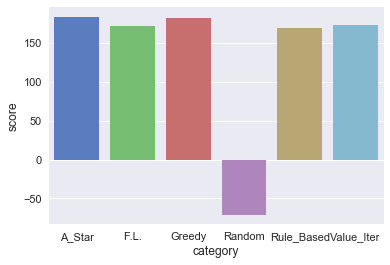

In [28]:
ax = sns.barplot(x="category", y="score", data=score_mean, estimator=median, ci="sd", palette='muted')

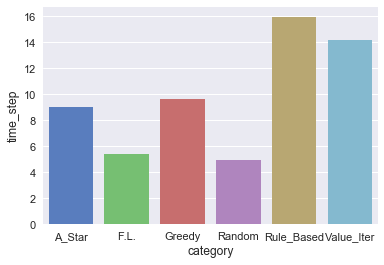

In [29]:
ax = sns.barplot(x="category", y="time_step", data=time_step_mean, estimator=median, ci="sd", palette='muted')

In [30]:
# calculate mean for score
data[['score', 'category']].groupby('category')['score'].mean()

category
A_Star        184.000000
F.L.          172.235788
Greedy        182.744439
Random        -70.686604
Rule_Based    170.161147
Value_Iter    173.706377
Name: score, dtype: float64

In [31]:
# calculate mean for time_step
data[['time_step', 'category']].groupby('category')['time_step'].mean()

category
A_Star         9.000000
F.L.           5.413248
Greedy         9.627781
Random         4.976273
Rule_Based    15.919427
Value_Iter    14.146812
Name: time_step, dtype: float64

In [32]:
# calculate variance
data.var()

episode_number    3.453487e+05
score             1.215818e+04
time_step         4.339467e+01
global_time       6.017740e+07
dtype: float64